In [1]:
# jupyter settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Surface code

S_[[5,1,2]] Surface Code

$k=1$ means: original quantum register of size one is to be protected
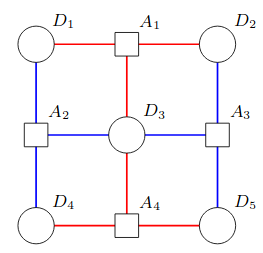

(from J. Roffe's review paper, Figure 8a,
https://arxiv.org/pdf/1907.11157.pdf#page=18)

circles: Data Qubits ($D_i, i=1,2, ..., n=5$ (making up Logical Qubit))

squares: Ancillary Qubits ($A_i, i=1,2, ..., m=n-k=4$ (making up Logical Qubit))

red edges: Controlled X-Stabilizer gate connection 

blue edges: Controlled Y-Stabilizer gate connection 

note: there is no full plaquette (diamond of 4 data qubits sourrounding one either X or Z type ancillary)

Here, it is merely tried to implement a circuit which contains the stabilizer measurements depicted in the above picture. 

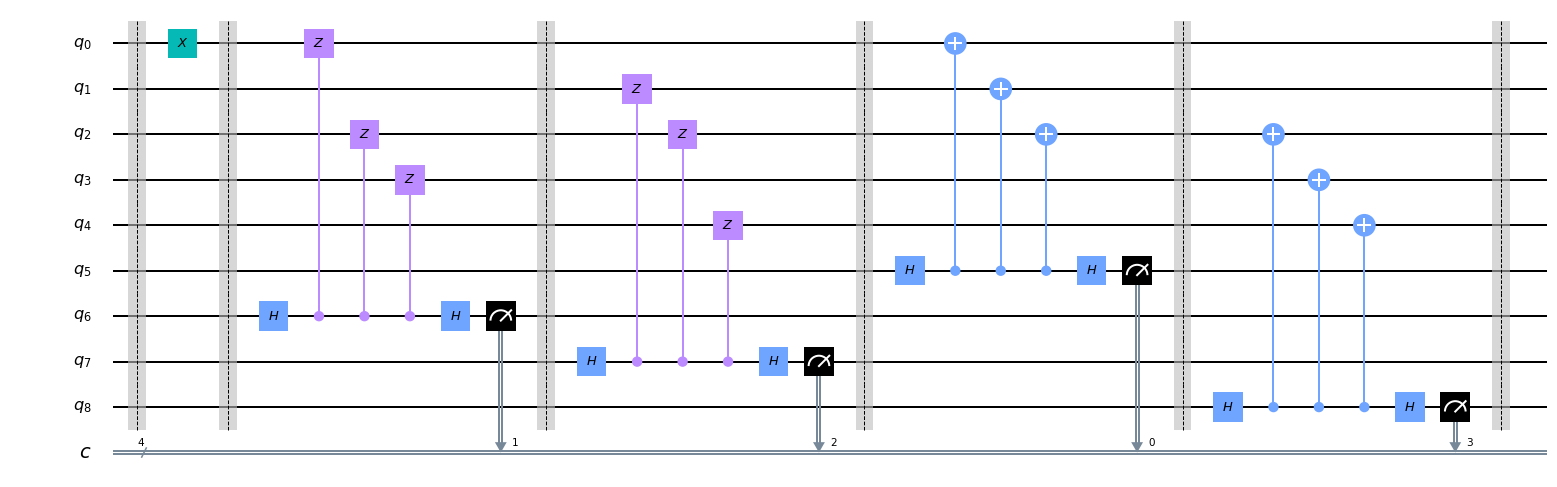

In [10]:
import numpy as np
from qiskit import *

%matplotlib inline

# Create a Quantum Circuit
circ = QuantumCircuit(9,4)

# S_[[5,1,3]] surface code

# 9 qubits, 1 original, 4 redundancy, 4 auxiliaries

# q0 -> D1
# q1 -> D2
# q2 -> D3
# q3 -> D4
# q4 -> D5

# q5 -> A1
# q6 -> A2
# q7 -> A3
# q8 -> A4

# encoding stage of the original quantum register (is what would occur here)
# for phase flip detection demo (done previously), this was e.g. a hadamard on q_0 and cx's from q0 to q1, ..., q_m; -> GHZ state
# circ.h(0)
# circ.cx(0,1)
# circ.cx(0,2)
# circ.cx(0,3)
# circ.cx(0,4)

circ.barrier()

# error stage
circ.x(0)

circ.barrier()

# detection stage
# measure stabilizers of the S_[[5,1,2]] code, i.e. do Controlled-[Stabilizer] operation 
# on the logical qubit and then measure the ancillary qubit

# --- measure bit-flip detecting stabilizers: Z's ---

# measure Z_D1 Z_D3 Z_D4 -> A2
circ.h(6)
# A2, D1
circ.cz(6,0)
# A2, D3
circ.cz(6,2)
# A2, D4
circ.cz(6,3)

circ.h(6)
circ.measure(6,1)

circ.barrier()

# measure Z_D2 Z_D3 Z_D5 -> A3
circ.h(7)
# A3, D2
circ.cz(7,1)
# A3, D3
circ.cz(7,2)
# A3, D5
circ.cz(7,4)

circ.h(7)
circ.measure(7,2)

circ.barrier()


# --- measure phase-flip detecting stabilizers: X's ---

# measure X_D1 X_D2 X_D3 -> A1
circ.h(5)
# A1, D1
circ.cx(5,0)
# A1, D2
circ.cx(5,1)
# A1, D3
circ.cx(5,2)

circ.h(5)
circ.measure(5,0)

circ.barrier()

# measure X_D3 X_D4 X_D5 -> A4
circ.h(8)
# A4, D3
circ.cx(8,2)
# A4, D4
circ.cx(8,3)
# A4, D5
circ.cx(8,4)

circ.h(8)
circ.measure(8,3)

circ.barrier()

# drawing the circuit
circ.draw(fold=90, output="mpl")

### OpenQASM backend

{'0100': 32469, '0101': 32873, '1010': 32772, '1100': 32798, '0011': 32990, '1101': 32819, '0010': 32904, '1011': 32519}


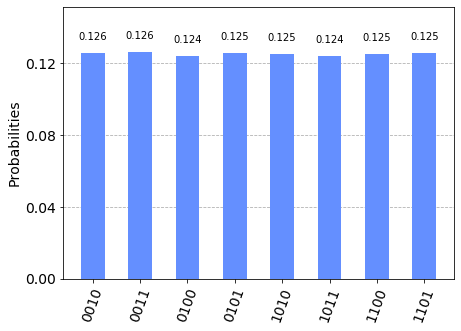

In [9]:
from qiskit.visualization import plot_histogram
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

job_sim = execute(circ, backend_sim, shots=2**18)

# get the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)

plot_histogram(counts)

classical bit string: c_3 c_2 c_1 c_0.

The first two stabilizer measurements (into c_2 c_1) give the bit string 01. Until this point, the Z-Basis single-qubit measurements are certain to be 01. Continuing from the resulting wavefunction after the measurement into the classical quibt c_2, there is a 1/2 probability for each outcome at the measurement into c_0. Continuing with one of the 2 possible wave functions after the measurement into c_0, measurement into c_3 also has a 1/2 probability of either 0 or 1. 
This is the reason why we obtain an even distribution for the occurrence of the different bit strings. The more often the circuit is being run (simulated without noise model), the more even the distribution will become.